In [183]:
import pandas as pd

### **Data Preprocessing**

In [184]:
data = pd.read_csv("../datasets/Customers.csv")
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
25,26,Male,29,28,82
177,178,Male,27,88,69
53,54,Male,59,43,60
197,198,Male,32,126,74
113,114,Male,19,64,46


#### Here Only use last two colums

In [185]:
data = data[["Annual Income (k$)", "Spending Score (1-100)"]]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
54,43,45
172,87,10
166,86,20
109,63,48
196,126,28


In [186]:
# rename names of columns for simplicity
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

data.sample(5)

,income,score
66,48,50
29,29,87
172,87,10
26,28,32
146,77,36


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  200 non-null    int64
 1   score   200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [188]:
data.describe()

,income,score
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


#### Get the idea of the datasets by plotting

In [189]:
import matplotlib.pyplot as plt

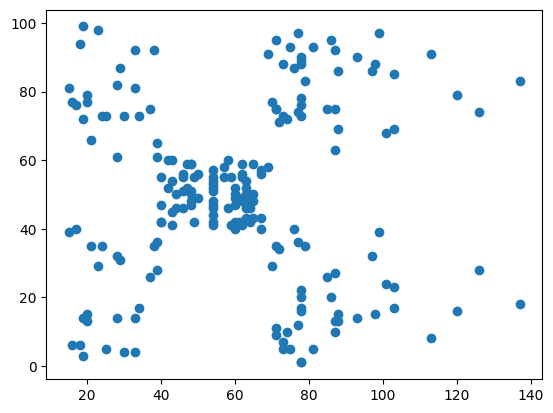

In [190]:
plt.scatter(data["income"], data["score"])
plt.show()

###
---

### **Find Optimal K value**

#### Determine the optimal number of clusters using **Elbow Method**

In [191]:
from sklearn.cluster import KMeans

- **model.inertia_** : Return the `WCSS Error` (Inertia Error) Of the KMeans *model*

In [192]:
k_range = range(1,10)
wcss_err = []

for k in k_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data)
    wcss_err.append(kmeans_model.inertia_)

print(wcss_err)

[269981.28, 183782.0284261853, 106348.37306211118, 73679.78903948836, 44448.45544793371, 38792.36729307514, 30552.71402546729, 25022.48500453035, 23185.140409764386]


##### Plot the Elbow Curve

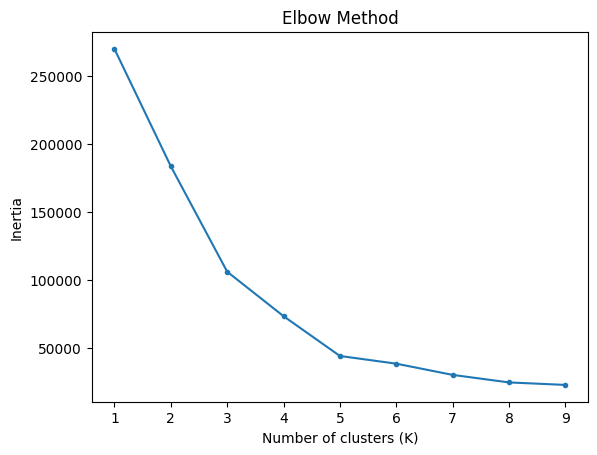

In [193]:
plt.plot(k_range, wcss_err, marker=".")
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

####
---

#### Determine the optimal number of clusters using **Silhouette Score Method**

In [194]:
from sklearn.metrics import silhouette_score

In [195]:
# Compute silhouette scores for different k
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    y_kmeans = kmeans.fit_predict(data)
    score = silhouette_score(data, y_kmeans)
    silhouette_scores.append(score)

print(silhouette_scores)

[np.float64(0.37581868858714457), np.float64(0.46761358158775435), np.float64(0.4937945814354117), np.float64(0.4683356920828562), np.float64(0.53976103063432), np.float64(0.4553566374071049), np.float64(0.4563878530002299), np.float64(0.44103476204021236)]


##### Plot the Silhouette scores

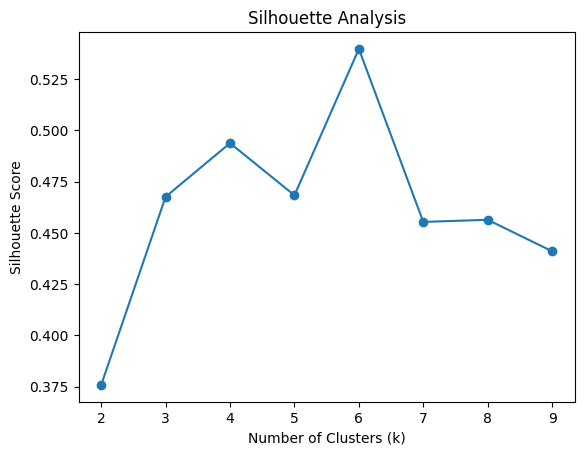

In [196]:
plt.plot(range(2, 10), silhouette_scores, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

###
---

### **Model Training**

In [197]:
from sklearn.cluster import KMeans

- Train the model Using Optimal *K*
- **model.fit_predict(x)** : Train the model and return the predictions

In [198]:
model = KMeans(n_clusters=5)
model.fit(data)

KMeans(n_clusters=5)

In [199]:
predictions = model.predict(data)

In [200]:
predictions

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [201]:
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


- Add the prediction values as a column of the dataframe *(Only for Understanding)*

In [202]:
data["cluster"] = predictions
data.head()

,income,score,cluster
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0


- **model.cluster_centers_** : Return the centroids of clusters.

In [203]:
centers = model.cluster_centers_
centers

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

###
---

### **Plot the clusters**

#### Method 01

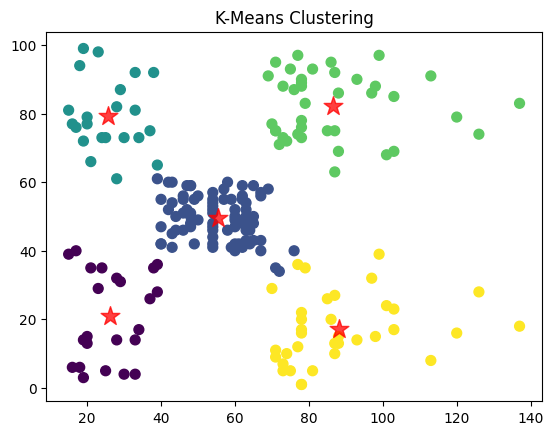

In [204]:
# Plot the clusters
plt.scatter(data["income"], data["score"], c=predictions, cmap='viridis', s=50)
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='*')
plt.title("K-Means Clustering")
plt.show()

#### Method 02

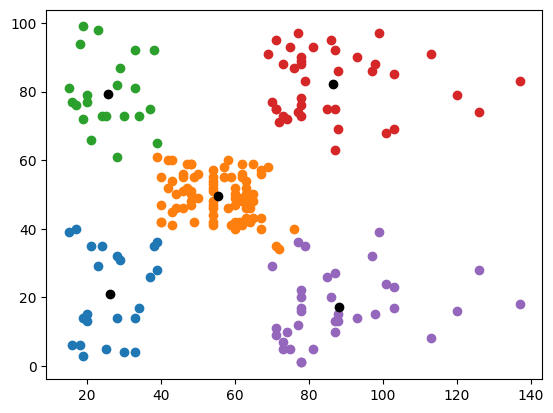

In [205]:
# visualize clusted data

cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['income'], cluster1['score'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['income'], cluster3['score'])

cluster2 = data[data['cluster']==3]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==4]
plt.scatter(cluster3['income'], cluster3['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')